In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import sklearn

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190226/'

In [3]:
dir_list = ['people30000']
seed_list = [str(123 + i) for i in range(1)]
csv_list = ['census', 'mobile']

In [4]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                encoding='Shift_JISx0213')
            csv_array[_dir][_seed][_csv] = df

In [5]:
people = 'people30000'
seed = '123'

# 全体の回帰直線

y =              2
-0.0004528 x + 0.9822 x + 177.1
相関 =  0.0014176056809090654
R^2 =  -3.0948867985030626


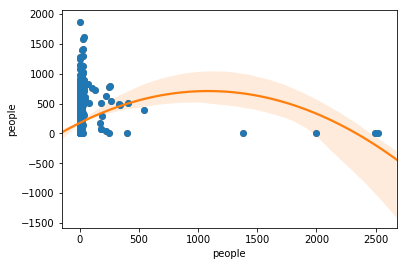

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

df = csv_array[people][seed].copy()
trainX = df['mobile']['people'] 
trainY = df['census']['people']

# plt.figure(dpi=600)
plt.xlabel('モバイル空間統計')
plt.ylabel('道路交通センサス')
plt.plot(trainX, trainY, 'o')

order=2
sns.regplot(x=trainX, y=trainY, order=order, ci=75)
z = np.polyfit(trainX, trainY, order)
z = np.squeeze(z)
p = np.poly1d(z)
print('y = ', p)
print('相関 = ', np.corrcoef(trainX, trainY)[0,1])
print('R^2 = ', r2_score(trainX, trainY))
p = np.asanyarray(p)

x = trainX
y = p[0]*x**2 + p[1]*x + p[2]


# plt.savefig('correlation_{0}.png'.format(people))

In [9]:
csv_array_3d = {}
for _dir in dir_list:
    csv_array_3d[_dir] = {}
    for _seed in seed_list:
        csv_array_3d[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_3d[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                    encoding='Shift_JISx0213')
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            group_list = df.groupby(['time'], sort=False)
            for _times, _group in group_list:
#                 df = convert_area_to_contour(base.copy(), _group.copy())
                df = df.sort_index(ascending=False)
                csv_array_3d[_dir][_seed][_csv][_times] = df

In [24]:
time = '21600'

y =              2
-0.0004528 x + 0.9822 x + 177.1
相関 =  0.0014176056809090077
R^2 =  -3.0948867985030626


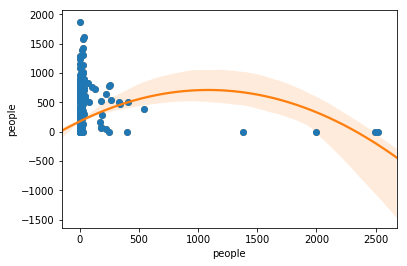

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

df = csv_array_3d[people][seed].copy()
trainX = df['mobile'][time]['people'].copy()
trainY = df['census'][time]['people'].copy()

# plt.figure(dpi=600)
plt.xlabel('モバイル空間統計')
plt.ylabel('道路交通センサス')
plt.plot(trainX, trainY, 'o')

order=2
sns.regplot(x=trainX, y=trainY, order=order, ci=75)
z = np.polyfit(trainX, trainY, order)
z = np.squeeze(z)
p = np.poly1d(z)
print('y = ', p)
print('相関 = ', np.corrcoef(trainX, trainY)[0,1])
print('R^2 = ', r2_score(trainX, trainY))
p = np.asanyarray(p)

x = trainX
y = p[0]*x**2 + p[1]*x + p[2]


# plt.savefig('correlation_{0}.png'.format(people))